In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from texttable import Texttable

# Загрузка данных

In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

# Задание 1. LIMIT_BAL

**LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)**

Размер кредитного лимита (LIMIT_BAL). 

В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:   

a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки  
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.  

Значимы ли полученные результаты с практической точки зрения ?

In [5]:
limit_bal_default0 = data[data.default == 0][['LIMIT_BAL']]
limit_bal_default1 = data[data.default == 1][['LIMIT_BAL']]

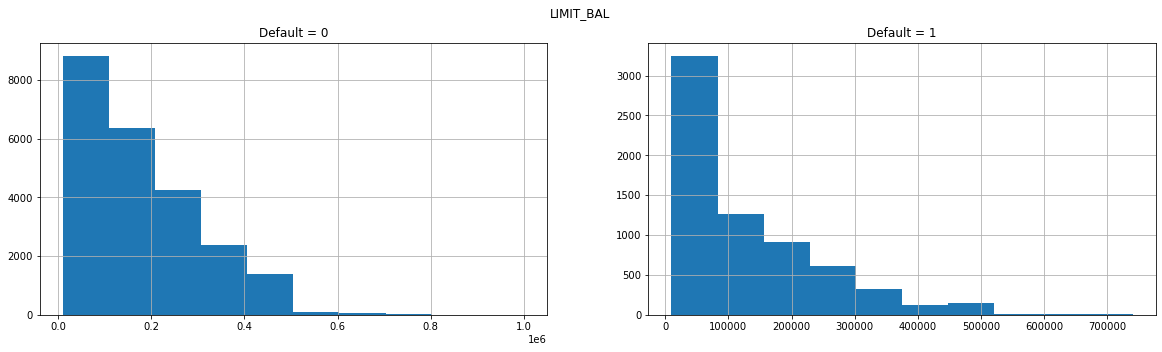

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('LIMIT_BAL')

ax1.set_title('Default = 0')
ax1.grid()
ax2.set_title('Default = 1')
ax2.grid()

ax1.hist(limit_bal_default0)
ax2.hist(limit_bal_default1)

plt.show()

## Оценка медианы

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def bootstrap_stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return tuple(boundaries)

In [8]:
np.random.seed(0)

limit_bal_med_default0 = list(map(np.median, get_bootstrap_samples(limit_bal_default0.values, 1000)))
limit_bal_med_default1 = list(map(np.median, get_bootstrap_samples(limit_bal_default1.values, 1000)))

In [9]:
print('Default = 0 median interval: %f <= med(X) <= %f' % bootstrap_stat_intervals(limit_bal_med_default0))

Default = 0 median interval: 150000.000000 <= med(X) <= 150000.000000


In [10]:
print('Default = 1 median interval: %f <= med(X) <= %f' % bootstrap_stat_intervals(limit_bal_med_default1))

Default = 1 median interval: 80000.000000 <= med(X) <= 90000.000000


In [11]:
print('Median delta:', limit_bal_default0.quantile(0.5) - limit_bal_default1.quantile(0.5))

Median delta: LIMIT_BAL    60000.0
Name: 0.5, dtype: float64


Медианы отличаются значительно. В выборке вернувших кредит кредитные лимит как правило больше

## Гипотеза о равенстве распределений

In [12]:
stats.mannwhitneyu(limit_bal_default0, limit_bal_default1, alternative='two-sided')

MannwhitneyuResult(statistic=array([95786286.5]), pvalue=array([1.22554858e-189]))

Нулевая гипотеза о равенстве распределений отвергается на уровне значимости 0.05

## Выводы

Среди отдавших и неотдавших кредит распределения кредитного лимита значимо отличаются. Медиана в выборке отдавших кредит значимо больше. Но возможно, причинно-следственная связь тут обратная - тем, кто отдаёт кредиты дают больший лимит

# Задание 2. SEX

**SEX: пол клиента (1 = мужской, 2 = женский)**

Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  

Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [13]:
sex_default0 = data[data.default == 0][['SEX']]
sex_default1 = data[data.default == 1][['SEX']]

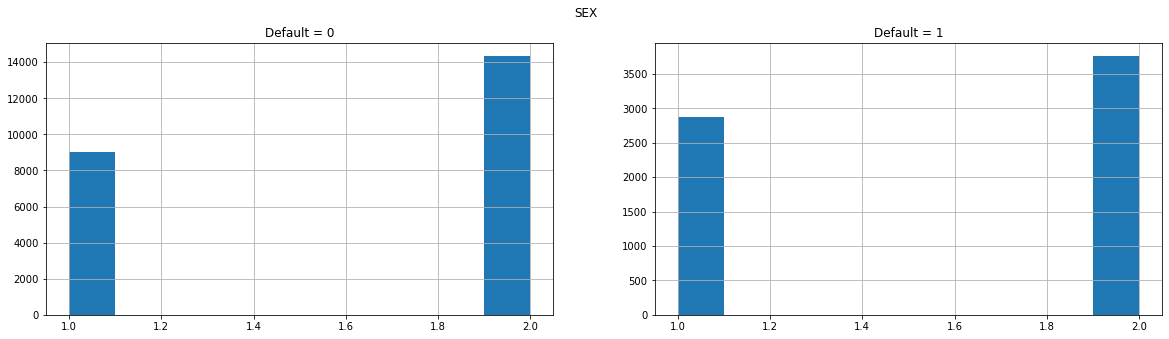

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('SEX')

ax1.set_title('Default = 0')
ax1.grid()
ax2.set_title('Default = 1')
ax2.grid()

ax1.hist(sex_default0)
ax2.hist(sex_default1)

plt.show()

In [15]:
sex_default0.value_counts()

SEX
2      14349
1       9015
dtype: int64

In [16]:
sex_default1.value_counts()

SEX
2      3763
1      2873
dtype: int64

## Доверительные интервалы

Используем доверительные интервалы для доли

In [17]:
male_count_default0 = sex_default0[sex_default0.SEX == 1].shape[0]
all_count_default0 = sex_default0.shape[0]

male_count_default1 = sex_default1[sex_default1.SEX == 1].shape[0]
all_count_default1 = sex_default1.shape[0]

In [18]:
print('Default = 0, male confidential interval (alpha=0.05): (%f, %f)' % proportion_confint(male_count_default0, all_count_default0))

Default = 0, male confidential interval (alpha=0.05): (0.379608, 0.392092)


In [19]:
print('Default = 1, male confidential interval (alpha=0.05): (%f, %f)' % proportion_confint(male_count_default1, all_count_default1))

Default = 1, male confidential interval (alpha=0.05): (0.421020, 0.444863)


Доверительные интервалы не пересекаются. Можно предположить, что среди неотдавших кредит большая доля мужчин

In [20]:
def male_proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1.values == 1)) / len(sample1)
    p2 = float(sum(sample2.values == 1)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [21]:
print('Default = 1/0 diff male confidential interval (alpha=0.05): (%f, %f)' % male_proportions_diff_confint_ind(sex_default1, sex_default0))

Default = 1/0 diff male confidential interval (alpha=0.05): (0.033635, 0.060548)


Доверительный интервал для разницы долей лежит правее нуля в пределах от 3 до 6 процентов

## Проверка равенства распределений

In [22]:
def male_proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1.values == 1)) / n1
    p2 = float(sum(sample2.values == 1)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [23]:
z_stat = male_proportions_diff_z_stat_ind(sex_default1, sex_default0)
z_stat

6.921375088562897

In [24]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [25]:
proportions_diff_z_test(z_stat)

4.472866521609831e-12

Нулевая гипотеза о том, что распределение полов в выборках с default = 0 и 1 отвергается на уровне значимости 0.05

При этом интервальная оценка даёт информацию, что в выборке неотдавших кредит мужчин на 3-6% больше

## Выводы

Практическая значимость данной оценки зависит от требований бизнеса (является ли критичным уровень 3-6%) и того, готов ли он на использование не слишком этичного признака в модели

# Задание 3. EDUCATION

**EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных).**

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.

Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг.

Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.

Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости?

Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг? наоборт, не отдаст долг?

In [26]:
edu_default0 = data[data.default == 0][['EDUCATION']]
edu_default1 = data[data.default == 1][['EDUCATION']]
edu_counts = data['EDUCATION'].value_counts()

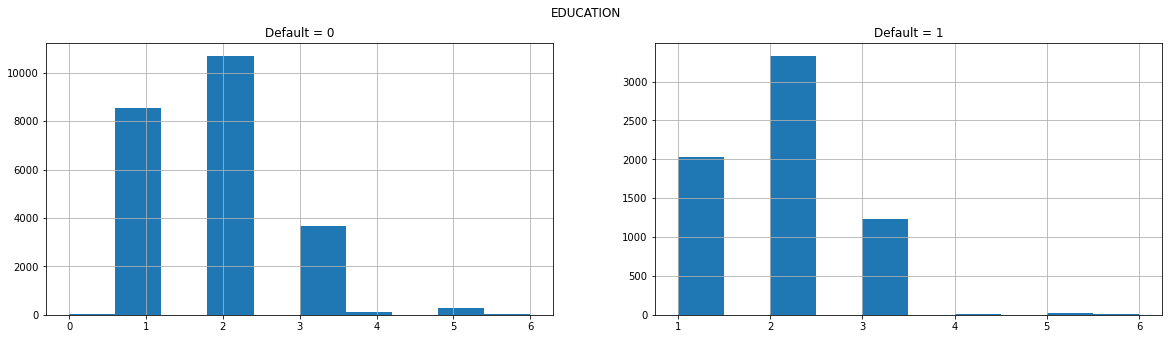

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('EDUCATION')

ax1.set_title('Default = 0')
ax1.grid()
ax2.set_title('Default = 1')
ax2.grid()

ax1.hist(edu_default0)
ax2.hist(edu_default1)

plt.show()

In [28]:
edu_indexes = list(range(len(edu_counts)))
table_rows = [['Education / Default'] + [str(x) for x in edu_indexes], ['0'], ['1']]
edu_confusion_matrix = [[], []]

for edu in edu_indexes:
    proportion = edu_default0[edu_default0.EDUCATION == edu].count() / edu_default0.shape[0]
    table_rows[1].append(round(proportion, 3))
    edu_confusion_matrix[0].append(float(proportion))

for edu in edu_indexes:
    proportion = edu_default1[edu_default1.EDUCATION == edu].count() / edu_default1.shape[0]
    table_rows[2].append(round(proportion, 3))
    edu_confusion_matrix[1].append(float(proportion))

tbl = Texttable()
tbl.add_rows(table_rows)
print(tbl.draw())

+---------------------+-------+-------+-------+-------+-------+-------+-------+
| Education / Default |   0   |   1   |   2   |   3   |   4   |   5   |   6   |
+=====================+=======+=======+=======+=======+=======+=======+=======+
| 0                   | 0.001 | 0.366 | 0.458 | 0.158 | 0.005 | 0.011 | 0.002 |
+---------------------+-------+-------+-------+-------+-------+-------+-------+
| 1                   | 0     | 0.307 | 0.502 | 0.186 | 0.001 | 0.003 | 0.001 |
+---------------------+-------+-------+-------+-------+-------+-------+-------+


Можно составить таблицу долей людей с конкретным уровнем образования от всех людей в подвыборках. Это решит проблему разного масштаба

По таблице и гистограмме нельзя сделать вывод, что какой-то определённый уровень образования даёт гарантии на возврат или невозврат долга

В выборке вернувших долг есть доктора наук, но их слишком мало, чтобы делать выводы

Попробуем посчитать корреляцию между признаками. Поскольку это два категориальных признака, нужно взять коэффициент V Крамера

In [29]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [30]:
cramers_corrected_stat(np.array(edu_confusion_matrix))

-0.0

Корреляция нулевая

## Выводы

Уровень образования действительно никак не влияет на возврат кредита и не может использоваться в скоринговой модели

# Задание 4. MARRIAGE

**MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).**

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [31]:
mar_default0 = data[data.default == 0][['MARRIAGE']]
mar_default1 = data[data.default == 1][['MARRIAGE']]
mar_counts = data['MARRIAGE'].value_counts()

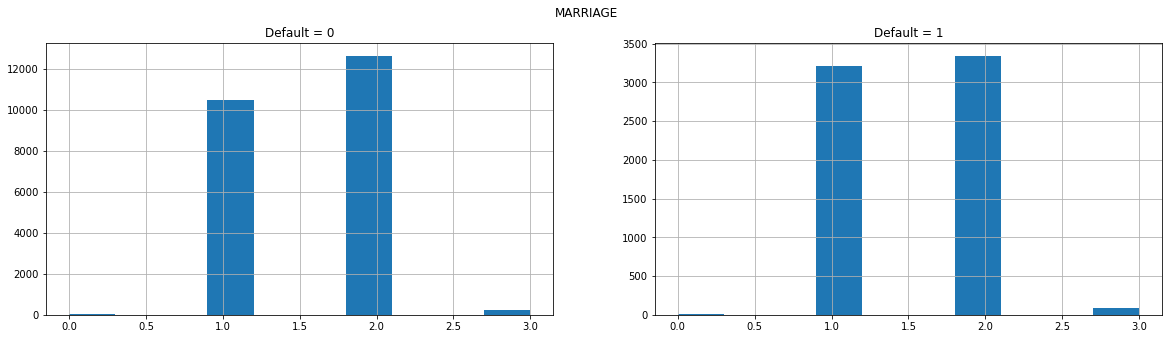

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('MARRIAGE')

ax1.set_title('Default = 0')
ax1.grid()
ax2.set_title('Default = 1')
ax2.grid()

ax1.hist(mar_default0)
ax2.hist(mar_default1)

plt.show()

Здесь мы также ищем взаимосвязь между категориальными переменными, поэтому можно применить тот же подход, что и в предыдущем задании

In [33]:
mar_indexes = list(range(len(mar_counts)))
table_rows = [['Marriage / Default'] + [str(x) for x in mar_indexes], ['0'], ['1']]
mar_confusion_matrix = [[], []]

for mar in mar_indexes:
    proportion = mar_default0[mar_default0.MARRIAGE == mar].count() / mar_default0.shape[0]
    table_rows[1].append(round(proportion, 3))
    mar_confusion_matrix[0].append(float(proportion))

for mar in mar_indexes:
    proportion = mar_default1[mar_default1.MARRIAGE == mar].count() / mar_default1.shape[0]
    table_rows[2].append(round(proportion, 3))
    mar_confusion_matrix[1].append(float(proportion))

tbl = Texttable()
tbl.add_rows(table_rows)
print(tbl.draw())

+--------------------+-------+-------+-------+-------+
| Marriage / Default |   0   |   1   |   2   |   3   |
+====================+=======+=======+=======+=======+
| 0                  | 0.002 | 0.447 | 0.540 | 0.010 |
+--------------------+-------+-------+-------+-------+
| 1                  | 0.001 | 0.483 | 0.503 | 0.013 |
+--------------------+-------+-------+-------+-------+


In [34]:
cramers_corrected_stat(np.array(mar_confusion_matrix))

-0.0

## Выводы

Между семейным статусом и возвратом долга также нет корреляции

# Задание 5. AGE

**AGE: возраст в годах**

Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:   

a) о равенстве медианных значений возрастов людей   
b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних.  

Значимы ли полученные результаты с практической точки зрения?

In [35]:
age_default0 = data[data.default == 0][['AGE']]
age_default1 = data[data.default == 1][['AGE']]

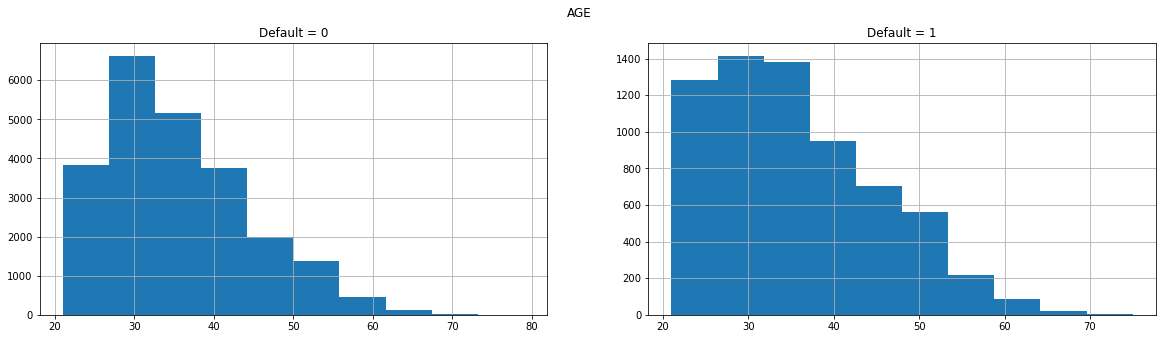

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('AGE')

ax1.set_title('Default = 0')
ax1.grid()
ax2.set_title('Default = 1')
ax2.grid()

ax1.hist(age_default0)
ax2.hist(age_default1)

plt.show()

## Оценка медианы

In [37]:
np.random.seed(0)

age_med_default0 = list(map(np.median, get_bootstrap_samples(age_default0.values, 1000)))
age_med_default1 = list(map(np.median, get_bootstrap_samples(age_default1.values, 1000)))

In [38]:
print('Default = 0 median interval: %f <= med(X) <= %f' % bootstrap_stat_intervals(age_med_default0))

Default = 0 median interval: 34.000000 <= med(X) <= 34.000000


In [39]:
print('Default = 1 median interval: %f <= med(X) <= %f' % bootstrap_stat_intervals(age_med_default1))

Default = 1 median interval: 34.000000 <= med(X) <= 35.000000


In [40]:
print('Median delta:', age_default0.quantile(0.5) - age_default1.quantile(0.5))

Median delta: AGE    0.0
Name: 0.5, dtype: float64


## Проверка равенства распределений

In [41]:
stats.mannwhitneyu(age_default0, age_default1, alternative='two-sided')

MannwhitneyuResult(statistic=array([76966879.5]), pvalue=array([0.37250354]))

Не смотря на равенство медиан нулевая гипотеза о равенстве распределений отвергается на уровне значимости 0.05

## Выводы

По признаку "возраст" мы получили разные распределения. С практической точки зрения это значит, что данный признак может использоваться в скоринговой модели